# Google Play Store Apps Analysis

## I) Introduction

For this project, we will try to image ourself in the following scenario: we are working as data analysts for a company and our team is tasked with analyzing data on mobile apps available on Google Play in order to create a model that can predict the rating of our unreleased apps. In this sense, we will also need to provide insights to our developers to help them make data-driven decisions by understanding what type of features an app needs to have to attract more users and ultimately get a higher rating. We were given a small dataset to work with, and we were told that we have 1 week to present our findings to the team.

Given the scenario above, will focus on doing a comprehensive data analysis and try to gain as much insights as possible from the dataset. After that we hope to be able to use that information to build a mock model that can predict the rating of an app based on the features we have in the dataset. To avoid possible complication and time related problems, we will do all our prototyping and analysis in a Jupyter Notebook with pre-defined models from the `sklearn` library.

We keep on putting the accent on the importance of the data analysis part because it is the most critical part of any data related the project. In most real world scenarios, the data is not clean and ready to be used, and it is the job of the data analyst to clean, preprocess, and analyze the data to extract meaningful insights. This is why working with data accounts for 80% of the time of a data scientist or machine learning engineer.


## II) Data Exploration

The dataset that we will be analyzing is the Google Play Store Apps dataset that can be found [on Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data).
The dataset contains information about 10,841 Android apps from Google Play Store. The data was scraped from the Google Play Store in September 2018 and it's stored in a CSV file named `googleplaystore.csv` in the `data` folder. We intentioally refused to read to much about this dataset on Kaggle to try to simulate a real scenario where we are given a dataset and we need to explore it to understand its structure and the information it contains. We go step by step with the basic data exploration practices and we will make observations when necessary.


In [1]:
# We will start by importing the necessary libraries, modules and functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset
data = pd.read_csv('data/googleplaystore.csv')

In [3]:
# Display 5 random samples to see what the data looks like
data.sample(5)

App            Category  Rating  \
7611             Block Survival Craft:The Story              FAMILY     4.1   
6540                 BN Pro Black Text on White  LIBRARIES_AND_DEMO     3.9   
898    Movies by Flixster, with Rotten Tomatoes       ENTERTAINMENT     4.5   
10723                               Mobile Kick              SPORTS     4.3   
5132                                 MD PAWS AH             MEDICAL     NaN   

      Reviews  Size     Installs  Type Price Content Rating            Genres  \
7611     7046   87M     500,000+  Free     0   Everyone 10+            Puzzle   
6540       53  334k      10,000+  Free     0       Everyone  Libraries & Demo   
898    653008   16M  10,000,000+  Free     0       Everyone     Entertainment   
10723  111809   40M  10,000,000+  Free     0       Everyone            Sports   
5132        0   29M         100+  Free     0       Everyone           Medical   

            Last Updated  Current Ver   Android Ver  
7611    October 12, 2017        0.2.7  4.0.3 and up  
6540    February 5, 2017        2.3.2    1.6 and up  
898        June 20, 2018        9.1.4    4.4 and up  
10723   February 7, 2018       1.0.21    4.1 and up  
5132   February 23, 2018  300000.0.98  4.0.3 and up

In [4]:
# Let's check the shape of the dataset and the columns
print('Shape of the dataset:', data.shape)
print('Columns in the dataset:', data.columns)

Shape of the dataset: (10841, 13)
Columns in the dataset: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [5]:
# It is always a good idea to check the .info() and .describe() methods since they provide a lot of useful information about the dataset.
# The .info() method provides information about the dataset, the data types of each column, and the number of non-null values in each column,
# while the .describe() method provides a statistical summary of the dataset, where you can easily see the minimum, maximum, mean, and percentiles of the data.

data.info()
# We will include the parameter include='all' in the .describe() method to include all the columns in the dataset, not just the numerical columns.
data.describe(include='all').T # Don't forget to transpose the data to make it easier to read

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


count unique                 top   freq      mean       std  \
App              10841   9660              ROBLOX      9       NaN       NaN   
Category         10841     34              FAMILY   1972       NaN       NaN   
Rating          9367.0    NaN                 NaN    NaN  4.193338  0.537431   
Reviews          10841   6002                   0    596       NaN       NaN   
Size             10841    462  Varies with device   1695       NaN       NaN   
Installs         10841     22          1,000,000+   1579       NaN       NaN   
Type             10840      3                Free  10039       NaN       NaN   
Price            10841     93                   0  10040       NaN       NaN   
Content Rating   10840      6            Everyone   8714       NaN       NaN   
Genres           10841    120               Tools    842       NaN       NaN   
Last Updated     10841   1378      August 3, 2018    326       NaN       NaN   
Current Ver      10833   2832  Varies with device   1459       NaN       NaN   
Android Ver      10838     33          4.1 and up   2451       NaN       NaN   

                min  25%  50%  75%   max  
App             NaN  NaN  NaN  NaN   NaN  
Category        NaN  NaN  NaN  NaN   NaN  
Rating          1.0  4.0  4.3  4.5  19.0  
Reviews         NaN  NaN  NaN  NaN   NaN  
Size            NaN  NaN  NaN  NaN   NaN  
Installs        NaN  NaN  NaN  NaN   NaN  
Type            NaN  NaN  NaN  NaN   NaN  
Price           NaN  NaN  NaN  NaN   NaN  
Content Rating  NaN  NaN  NaN  NaN   NaN  
Genres          NaN  NaN  NaN  NaN   NaN  
Last Updated    NaN  NaN  NaN  NaN   NaN  
Current Ver     NaN  NaN  NaN  NaN   NaN  
Android Ver     NaN  NaN  NaN  NaN   NaN

We already observe that the dataset contains columns that need to be converted to numerical values. For start we can convert the columns `Size`, `Installs`, `Price` and `Reviews` to numerical values. We can also convert the `Last Updated` column to a datetime object. We will also check for any iregularities in the dataset and try to fix them if possible.


In [6]:
# We see if there are any non numeric values in the Reviews column, remove those entries(if any) and convert the column to integer type.
data.Reviews = pd.to_numeric(data.Reviews, errors='coerce')
data.dropna(subset=['Reviews'], inplace=True)
data.Reviews = data.Reviews.astype(int)
data.Reviews # As you can see, there was one non-numeric value in the Reviews column which has been removed.

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

From the first examples we looked at, we saw that the `Size` column contains values with different units (e.g. 'M', 'k'). We will need to convert these values to a single unit (e.g. 'M') and convert the column to a numerical data type.


In [7]:
# We will remove the 'M' and 'k' from the values in the `Size` column and convert the column to a numeric data type.
# Now all the values will be in MBs but as a float data type.
data.Size = data.Size.apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data.Size = data.Size.apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
data.Size = pd.to_numeric(data.Size, errors='coerce')
data.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

We also saw that the `Installs` column contains values with '+' and ',' characters while the `Price` column contains '$' characters. We will need to remove these characters to be able to cleanly convert the column to a numerical data type(int and float respectively).


In [8]:
# We will remove the dollar sign from the values in the `Price` column and convert the column to a numeric data type.
data.Price = data.Price.apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
data.Price = pd.to_numeric(data.Price, errors='coerce')

# We will remove the '+' and ',' from the values in the `Installs` column and convert the column to a numeric data type.
data.Installs = data.Installs.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
data.Installs = data.Installs.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data.Installs = pd.to_numeric(data.Installs, errors='coerce')
data.Installs = data.Installs.astype(int)

In [9]:
# Get the head of the dataset to see the changes
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

We will replace the `Last Updated` column with a new column `Days Since Last Update` which will contain the number of days since the app was last updated. We take the reference date as the maximum date in the `Last Updated` column.


In [10]:
# Replace `Last Updated` column with the number of days since the app was last updated.
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated Days'] = (data['Last Updated'].max() - data['Last Updated']).dt.days
data.drop(columns=['Last Updated'], inplace=True)
data['Last Updated Days']

0         213
1         205
2           7
3          61
4          49
         ... 
10836     379
10837      33
10838     565
10839    1297
10840      14
Name: Last Updated Days, Length: 10840, dtype: int64

## III) Data Cleaning

From our privious observations, we can see that the dataset needs some serious data cleaning. If we leave the dataset as it is, not only do we risk to break our models during training, but we also risk to get wrong insights from the data. Like the saying goes: "Garbage in, garbage out".


Type            0.009225
Android Ver     0.018450
Current Ver     0.073801
Rating         13.597786
Size           15.636531
dtype: float64


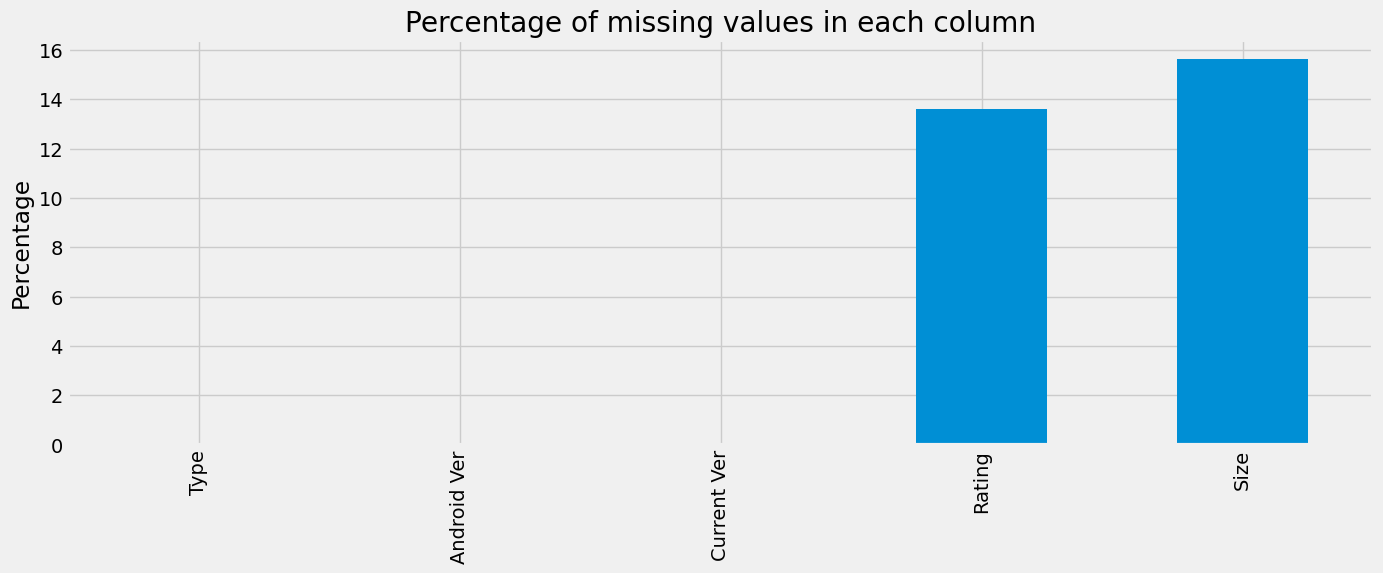

In [11]:
# Do a plot where we can visualize the percentage of Null values in each column as a bar plot.
plt.figure(figsize=(15, 5))
missing = data.isnull().mean() * 100
missing = missing[missing > 0]
missing.sort_values(inplace=True)
print(missing)
missing.plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')
plt.show()

We can see that there are 5 columns where we have missing values from witch `Rating` and `Size` are the most empty, with over 10% of the values missing! We will need to decide how to handle these missing values. We can either drop the rows with missing values, fill the missing values with the mean or median of the column. If we were to drop the data then we might love alot of the total amount of data we have(absulte scales also matter!!!). If we were to fill the missing values with the mean or median, we might introduce bias in our data depending on the distribution of the data. We will try a more advanced method using `IterativeImputer` from the `sklearn` library to fill the missing values.


In [12]:
# We will import the `IterativeImputer` class from the `sklearn.impute` module to impute the missing values in the dataset.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer to the numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

In [13]:
# Remove the remaining rows with missing values => We will only remove a very small number of rows while keeping the majority of the data.
data.dropna(inplace=True)

# Check if there are any missing values left
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Current Ver          0
Android Ver          0
Last Updated Days    0
dtype: int64

We will also check and remove dubplicate rows from the dataset, even though we don't expect to have many(if any).


In [14]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]
print('Number of duplicate rows:', duplicate_rows.shape[0]) # Number of duplicate rows: 483(Who collected this data?)
duplicate_rows

Number of duplicate rows: 483


App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

         Reviews       Size     Installs  Type  Price Content Rating  \
229      80805.0  29.498023    5000000.0  Free    0.0       Everyone   
236     159872.0  21.059160   10000000.0  Free    0.0       Everyone   
239      70991.0  21.170152    5000000.0  Free    0.0       Everyone   
256      31614.0  37.000000   10000000.0  Free    0.0       Everyone   
261       6989.0  21.413488    1000000.0  Free    0.0       Everyone   
...          ...        ...          ...   ...    ...            ...   
8643    404610.0  28.259349   10000000.0  Free    0.0       Everyone   
8654     25370.0  20.288163    1000000.0  Free    0.0       Everyone   
8658   2401017.0  29.855838  100000000.0  Free    0.0       Everyone   
10049      123.0  86.000000      10000.0  Free    0.0       Everyone   
10768       63.0  24.000000      10000.0  Free    0.0       Everyone   

             Genres         Current Ver         Android Ver  Last Updated Days  
229        Business  Varies with device        4.0.3 and up              163.0  
236        Business  Varies with device  Varies with device                8.0  
239        Business    2.19.0.204537701          4.4 and up               15.0  
256        Business      4.1.28165.0716          4.0 and up               19.0  
261        Business           4.3.0.508          4.4 and up               23.0  
...             ...                 ...                 ...                ...  
8643   Productivity  Varies with device  Varies with device              124.0  
8654   Productivity  Varies with device  Varies with device                2.0  
8658   Productivity  Varies with device  Varies with device               42.0  
10049       Medical              0.6.88          5.0 and up               68.0  
10768       Medical               2.3.1          5.0 and up               47.0  

[483 rows x 13 columns]

In [15]:
# Remove the duplicates from the dataset
data.drop_duplicates(inplace=True)

# Here we will make a copy of the original dataset to keep for EDA and use the cleaned dataset for the training and testing of the model.
data_cleaned = data.copy()

For the last part of the data cleaning process, we will try to remove any outliers from the dataset. We will use the `winsorize` from the `scipy` library to cap the outliers in the dataset. We will cap the outliers at the 1st and 99th percentile of the data. We will also use the `z-score` method too remove the outliers from the dataset. Since the above method only works for numerical columns, we will only remove outliers based on those columns.


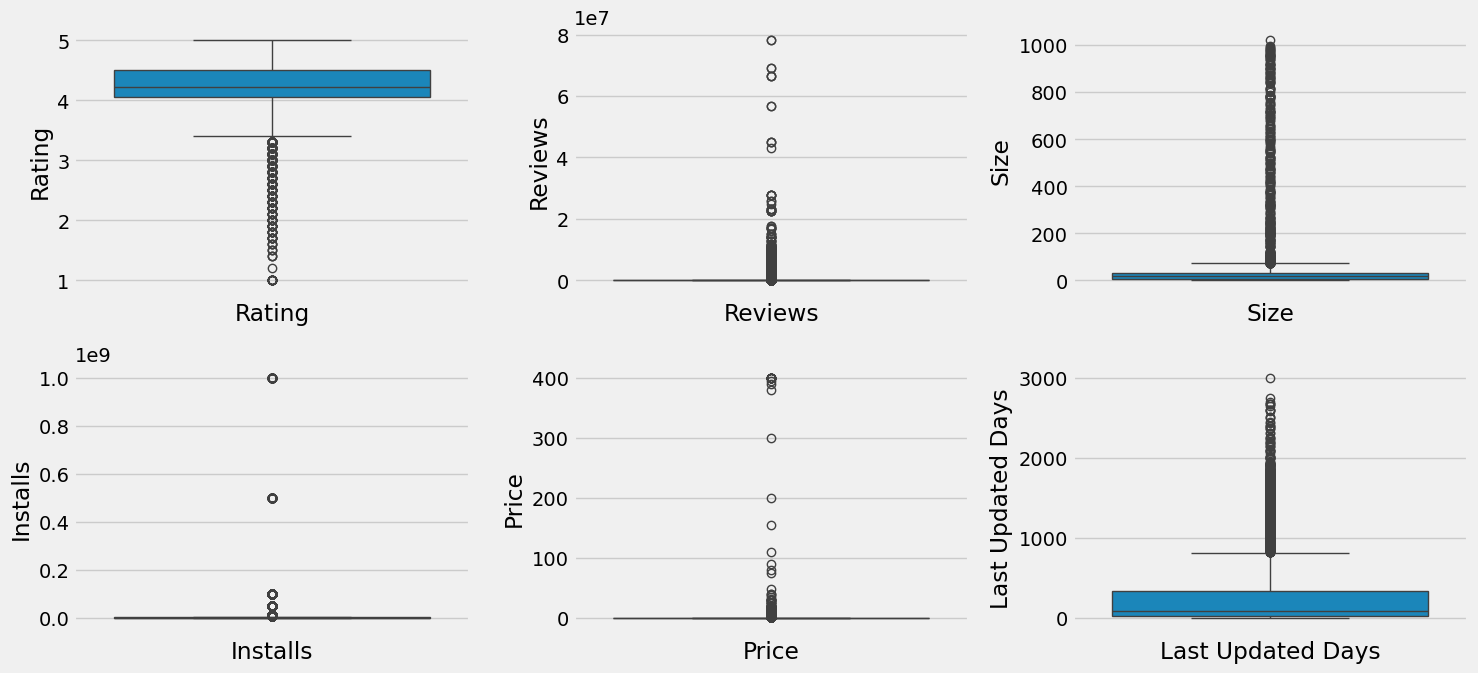

In [16]:
# Extract the numeric columns from the dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Do a boxplot for each of the numeric columns using the Seaborn library
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[col])
    plt.xlabel(col)
plt.tight_layout()
plt.show()


Wow, that's alot of outliers! Here we will presnet another inside that is important to keep in mind: the nature of the data and the domain knowledge. While there are alot of data points that might skew the statistics, those data points are in distribution! How do we know this? Becouse we expect the top apps to have a lot of installs and reviews. Normaly those top apps would be considered outliers(and in a way they are), but in this particular case, they are the apps that we are interested in! Becouse we knew the NATURE of our data we were able to reason that those data points are not outliers and we should keep them in our dataset if possible. Now the problem is that those columns still present a high variance in the data and we can't use them as they are. To solve that problem we will use the `log` transformation the `Price`, `Reviews` and `Installs` columns and then precede with the steps mentioned above.


In [17]:
# For the last part of the data cleaning process, we will try to remove any outliers from the dataset. We will use the `winsorize` from the `scipy` library to cap the outliers in the dataset. We will cap the outliers at the 1st and 99th percentile of the data. We will also use the `z-score` method too remove the outliers from the dataset. Since the above method only works for numerical columns, we will only remove outliers based on those columns.
from scipy.stats.mstats import winsorize
from scipy.stats import zscore

# Log-transform the `Price`, `Reviews`, and `Installs` columns to reduce the skewness in the data.
data['Price'] = np.log1p(data['Price'])
data['Reviews'] = np.log1p(data['Reviews'])
data['Installs'] = np.log1p(data['Installs'])

# Winsorize the numeric columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: winsorize(x, limits=[0.01, 0.01])) # We will cap the outliers at the 1st and 99th percentile of the data.

# Remove the outliers using the z-score method
z_scores = zscore(data[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# Check the shape of the dataset after removing the outliers
data.shape

(9297, 13)

We should also be careful of the categorical columns in the dataset. Bisides converting them to numerical values, we should also check for any irregularities in the data. We will check the unique values in the `Category`, `Type`, `Content Rating`, and `Genres` columns to see if a value dominates the column. If a value dominates the column doing a frequency encoding on the column. We will drop the `App` column since it is unique for each row and it doesn't provide any useful information and we will also drop the `Current Ver` column since they contains the version number of the app witch again, is not very useful.


In [18]:
from sklearn.preprocessing import LabelEncoder

# Drop the `App` column since it is not useful for the model
data.drop(columns=['App'], inplace=True)
data.drop(columns=['Current Ver'], inplace=True)

# Extract the categorical columns from the dataset
categorical_columns = data.select_dtypes(include=['object']).columns

# We will use the `LabelEncoder` class from the `sklearn.preprocessing` module to encode the categorical columns in the dataset.
label_encoder = LabelEncoder()

# We will iterate over the categorical columns and transform them to numerical values
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [19]:
# Get the frequency of each unique value in each categorical column
for column in categorical_columns:
    print(data[column].value_counts())
    print('\n')

Category
11    1732
14    1032
29     705
4      390
25     363
23     340
18     328
28     326
12     326
6      325
20     309
24     297
27     271
15     268
21     250
30     222
26     217
3      196
7      183
31     162
19     125
8      122
13     120
9      109
1       80
16      77
32      69
0       64
10      62
17      59
22      58
5       57
2       53
Name: count, dtype: int64


Type
0    9050
1     247
Name: count, dtype: int64


Content Rating
1    7447
4    1078
3     421
2     347
0       3
5       1
Name: count, dtype: int64


Genres
106    704
50     548
37     472
20     390
80     363
      ... 
91       1
105      1
88       1
35       1
104      1
Name: count, Length: 117, dtype: int64


Android Ver
17    2251
15    1366
13    1208
32    1161
20     831
8      559
25     511
18     354
9      239
19     209
10     198
7      118
5       57
27      52
29      38
2       35
12      28
26      20
3       18
1        9
21       9
11       7
31       5
30       3

## IV) Exploratory Data Analysis(EDA)

EDA is the most important part of any data analysis project. It is the part where we try to understand the data and extract meaningful insights, try to find an underlying structure in the data, extract variables(Feature Engineering) and allowing you to answer business questions. This will also the part that usually takes the most time in a data, as such we will try to be as thorough as possible. We will present this part as question-answer to try to simulate what kind of insights we might want to extract from the data.


#### **Q: What are the most popular categories in the Google Play Store?**

**A:** The most popular types of apps are the ones we expect, the biggest by the number of apps is `Family` followed by `Game` and `Tools`. Interestingly, dispite the gaming industry being much bigger on smartphones then on PCs, the `Family` category is the biggest by quite a margin.


In [20]:
cat_counts = data_cleaned['Category'].value_counts().reset_index()
cat_counts.columns = ['Category', 'Count']

fig_cat_breakdown = px.bar(
    cat_counts,
    x='Category',
    y='Count',
    title='Number of Apps by Category',
    color='Count',
    color_continuous_scale='Tealgrn'
)
fig_cat_breakdown.update_layout(xaxis_title='Category', yaxis_title='Number of Apps')
fig_cat_breakdown.show()

#### **Q: What categories have the highest ratings?**

**A:** First, we can see that most apps have a relatively high rating, with the majority of apps having a rating of 4 or higher(with the mean rating being 4.18). The distribution of the ratings is also quite normal with a slight skew to the right. If we look at the ratings by category, we can see that the `HEALTH_AND_FITNESS`, `EDUCATION`, and `ART_AND_DESIGN` categories have the highest ratings on average. This is interesting because these categories are not the most popular, but they have the highest ratings, `HEALTH_AND_FITNESS` having over 50% of the apps rated above 4.5! The `DATING` category has the lowest percentage of apps rated above 4.5, wiht a measly ~12%.


In [21]:
avg_rating = data_cleaned['Rating'].mean()
print('Average Rating:', avg_rating)

fig_rating_hist = px.histogram(
    data_cleaned,
    x='Rating',
    nbins=30,
    title='Distribution of App Ratings',
    marginal='box',   # Adds a small box plot above the histogram
    color_discrete_sequence=['teal']
)
fig_rating_hist.update_layout(xaxis_title='App Rating', yaxis_title='Count of Apps')
fig_rating_hist.show()


Average Rating: 4.1862375267804035


In [22]:
fig_violin_by_category = px.violin(
    data_cleaned,
    x='Category',
    y='Rating',
    title='App Ratings Distribution by Category',
    color='Category',
    box=True,  # adds box plot inside violin
    points='outliers'  # show outlier points
)

fig_violin_by_category.update_layout(
    xaxis_title='Category',
    yaxis_title='Rating',
    showlegend=False,
    xaxis_tickangle=45  # angle the category labels for better readability
)

fig_violin_by_category.show()


In [23]:
# Calculate the percentage of apps with ratings >= 4.5 for each category
high_rating_by_category = (
    data_cleaned.groupby('Category')
    .agg({'Rating': lambda x: (x >= 4.5).mean() * 100})
    .sort_values('Rating', ascending=False)
    .reset_index()
)

# Create a bar plot using plotly
fig = px.bar(
    high_rating_by_category,
    x='Category',
    y='Rating',
    title='Percentage of Apps with 4.5+ Rating by Category',
    color='Rating',
    color_continuous_scale='Tealgrn'
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Percentage of Apps with 4.5+ Rating',
    xaxis_tickangle=45
)

fig.show()

#### **Q: Does the size of an app affect its rating?**

**A:** We can observe quite ovious that the size of most apps is less than 100MB, with the majority of apps being less than 50MB. If we look at the relationship between the size of an app and its rating, we can see that optimal size is on the lower end.


In [24]:
fig_size_rating = px.scatter(
    data_cleaned,
    x='Size',
    y='Rating',
    color='Category',
    title='App Rating vs App Size (Colored by Category)',
    hover_data=['App', 'Reviews']
)
fig_size_rating.update_layout(xaxis_title='Size (MB)', yaxis_title='Rating')
fig_size_rating.show()


#### **Q: What does the price of high-rated apps look like?**

**A:** From this analysis, we can see that most apps are free, with a resonable upper limit of apps being 10$ or less. We also see an interesting trend that the frequency of apps that are of higher price with higher ratings rises as the price increases. We would expect that the higher the price of an app, the lower the rating because fewer people would be willing to pay for it.


In [25]:
df_filtered = data_cleaned[data_cleaned['Price'] < 50]   # Ignoring unrealistic prices above $50

fig_price_rating = px.scatter(
    df_filtered,
    x='Price',
    y='Rating',
    color='Category',
    title='App Rating vs Price (Under $50)',
    hover_data=['App', 'Reviews']
)
fig_price_rating.update_layout(xaxis_title='Price ($)', yaxis_title='Rating')
fig_price_rating.show()


#### **Q: Should out apps be free?**

**A:** Well from what we can tell at a quick glance, we not only see that the vast majority of apps are free but also they tend to also be donloaded more. If we are intrested in revenue, this observation might be a bit misleading since even tough most apps are free they most likely contain ads or in-app purchases(the so called `freemium` model). We can also see that there are certain categories where the price model is more prevalent, like `FAIMLY` and `GAME`(we also need to consider the fact that these are the most popular categories, so finding a niche is possible). We also see that nearly all of the apps that are paid are also small in size.


In [26]:
fig_installs_type = px.box(
    data_cleaned,
    x='Type',
    y='Installs',
    title='Number of Installs: Free vs Paid Apps',
    color='Type',
)
fig_installs_type.update_layout(yaxis_type='log', xaxis_title='', yaxis_title='Installs (log scale)')
fig_installs_type.show()


In [27]:
df_paid_counts = data_cleaned.groupby(['Category','Type'])['App'].count().reset_index()
df_paid_counts.columns = ['Category','Type','Count']

fig_paid_cat = px.bar(
    df_paid_counts,
    x='Category',
    y='Count',
    color='Type',
    title='Distribution of Free and Paid Apps by Category',
    barmode='group'
)
fig_paid_cat.update_layout(xaxis_title='Category', yaxis_title='Number of Apps')
fig_paid_cat.show()


In [28]:
fig = px.scatter(
    data_cleaned,
    x='Size',
    y='Rating',
    title='App Size vs Rating',
    labels={'Size': 'Size (MB)', 'Rating': 'Rating'},
    hover_data=['App', 'Reviews'],
    color='Type',
    color_discrete_map={'Paid': 'red', 'Free': 'blue'}
)
fig.show()

#### **Q: Can we quantify the relationship between the features?(for numerical features)**

**A:** Yes, we can use the `correlation matrix` to quantify the relationship between the features. We can see that the `Reviews` and `Installs` columns have a high correlation of ~0.63 while most of the other columns are independent of each other. From the first observation we deduced that when many peaple are leaving reviews, the app is also being downloaded alot. We might want to use this information to try to make the initial users to leave a review, thus creating a snowball effect.


In [300]:
# Subset of relevant numeric columns
corr_df = data_cleaned[numeric_columns]

# Create the correlation matrix
corr_matrix = corr_df.corr()

# Plot correlation matrix as a heatmap
fig_corr_heatmap = px.imshow(
    corr_matrix,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap"
)
fig_corr_heatmap.update_layout(width=700, height=500)
fig_corr_heatmap.show()

In [301]:
fig_scatter_reviews_installs = px.scatter(
    data_cleaned,
    x='Reviews',
    y='Installs',
    color='Category',
    hover_data=['App'],
    title='Relationship: Number of Reviews vs Number of Installs'
)
fig_scatter_reviews_installs.update_layout(xaxis_type='log', yaxis_type='log')
fig_scatter_reviews_installs.show()


## V) Modeling

The final part of our task, prototyping a model that can predict the rating of an app based on the features we have in the dataset. We will use 3 models from the `sklearn` library to predict the rating of an app. We will also use the `train_test_split` function from the `sklearn` library to split the data into training and testing sets. We will use the `StandardScaler` to scale the data before training the model. The metrics we will use to evaluate the model are the `mean squared error`. In short, it measures the average of the squares of the errors or deviations. It quantifies the difference between the estimator and what is estimated. The smaller the MSE, the closer we are to finding the line of best fit.


In [302]:
# We will use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

model_data = data.copy()

# Split the dataset into features and target variable
X = model_data.drop(columns=['Rating'])
y = model_data['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [303]:
# Check the shape of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (7437, 10) (7437,)
Testing set shape: (1860, 10) (1860,)


In [304]:
# We will use the `StandardScaler` class from the `sklearn.preprocessing` module to scale the features in the dataset.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the testing set
X_test = scaler.transform(X_test)

Now that we have split and standardized the data, we can train the models. We will use the `LinearRegression`, `RandomForestRegressor`, and `SVM` models from the `sklearn` library to predict the rating of an app.

To automate the process of training and evaluating the models, we will create a dataframe to store the results of the models by using the model type, dataset and the metric as multi-index columns.


In [305]:
import pandas as pd
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the categories
models = {
    'Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}
datasets = ['train', 'test']
metrics = {
    'RMSE': mean_squared_error
}

# Generate all possible combinations using itertools.product
combinations = list(itertools.product(models.keys(), datasets, metrics.keys()))

# Create a MultiIndex from the combinations
multi_index = pd.MultiIndex.from_tuples(combinations, names=['model', 'dataset', 'metric'])

# Initialize the DataFrame with the MultiIndex and a 'value' column
results_df = pd.DataFrame({'value': pd.NA}, index=multi_index)

# Define the datasets
data = {
    'train': (X_train, y_train),
    'test': (X_test, y_test)
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)

    for dataset_name, (X_data, y_data) in data.items():
        y_pred = model.predict(X_data)

        for metric_name, metric_func in metrics.items():
            if metric_name == 'RMSE':
                value = metric_func(y_data, y_pred)
            else:
                value = metric_func(y_data, y_pred)

            results_df.loc[(model_name, dataset_name, metric_name), 'value'] = value

# Display the results
results_df

value
model         dataset metric          
Linear        train   RMSE    0.123832
              test    RMSE    0.130867
Random Forest train   RMSE    0.016058
              test    RMSE    0.122589
SVM           train   RMSE    0.111513
              test    RMSE    0.125898

Well be got totaly garbage results from the models! The reason for this is that the models are not able to predict the rating of an app based on the features we have in the dataset. Did we do a bad preprocessing job? Did we not extract the right features? Did we not use the right model? Or maybe, we tought about the problem in the wrong way? What if instead of thinking about the rating of an app as a regression problem, we think about it as a classification problem? Let's try to convert the rating of an app to a categorical variable by rounding the rating to the nearest integer and then see the results.

To speed things up we will copy paste the code above and only make the needed modifications to the code.


In [306]:
y_train = y_train.round()
y_test = y_test.round()

In [307]:
import pandas as pd
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the categories
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}
datasets = ['train', 'test']
metrics = {
    'Accuracy': accuracy_score
}

# Generate all possible combinations using itertools.product
combinations = list(itertools.product(models.keys(), datasets, metrics.keys()))

# Create a MultiIndex from the combinations
multi_index = pd.MultiIndex.from_tuples(combinations, names=['model', 'dataset', 'metric'])

# Initialize the DataFrame with the MultiIndex and a 'value' column
results_df = pd.DataFrame({'value': pd.NA}, index=multi_index)

# Define the datasets
data = {
    'train': (X_train, y_train),
    'test': (X_test, y_test)
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)

    for dataset_name, (X_data, y_data) in data.items():
        y_pred = model.predict(X_data)

        for metric_name, metric_func in metrics.items():
            value = metric_func(y_data, y_pred)
            results_df.loc[(model_name, dataset_name, metric_name), 'value'] = value

# Display the results
print(results_df)

                                         value
model               dataset metric            
Logistic Regression train   Accuracy  0.772892
                    test    Accuracy  0.768817
Random Forest       train   Accuracy  0.999866
                    test    Accuracy  0.796237
SVM                 train   Accuracy  0.774371
                    test    Accuracy  0.767204


<Figure size 1000x600 with 0 Axes>

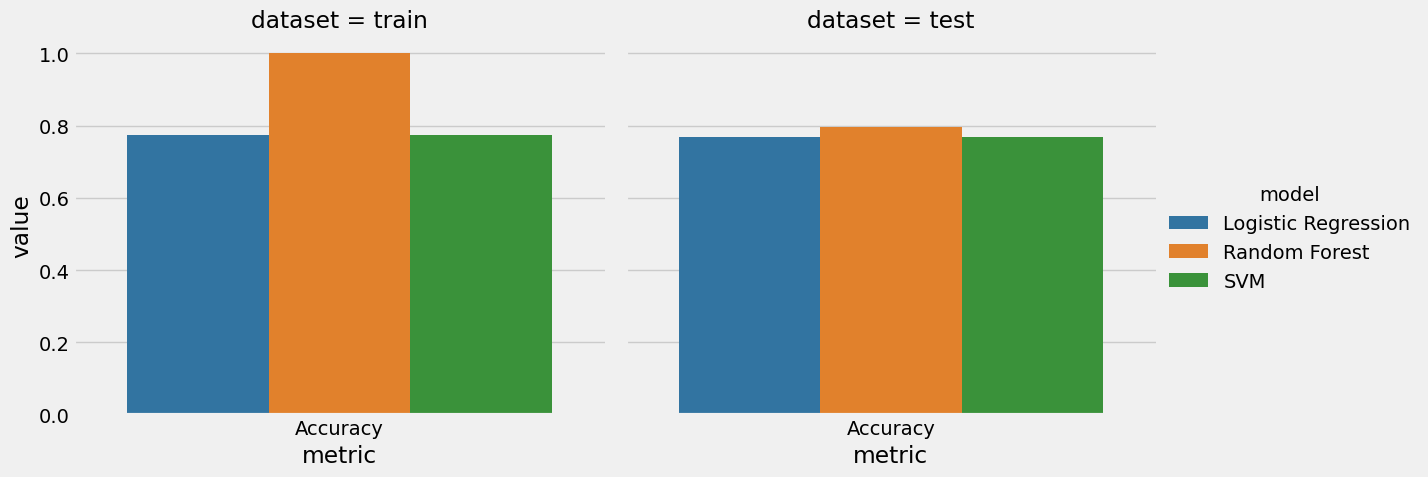

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert index to columns for easier plotting
results_df_reset = results_df.reset_index()

# Create the plot
plt.figure(figsize=(10, 6))

# Split the plot into two rows (one for train, one for test)
g = sns.catplot(
    data=results_df_reset,
    x="metric",
    y="value",
    hue="model",
    col="dataset",
    kind="bar",
    height=5,
    aspect=1.2,
    palette="tab10"
)

plt.show()

As we can see, the data that was given was, in fact, much better for a clasification problem then we tought. The results are still a bit lower then expected for the model to be practical but we tried to get the most out of the current dataset while still being able to at least get a feal about the possible ratting of our app.

At first glance, we might think that the `RandomForestClassifier` model is the best model, but we can see that it is overfitting the data because the training score is much higher than the testing score. And while both the `SVM` and `LogisticRegression` models have a similar testing score, the `SVM` is a more complex model and we might be able to further improve it's performance.
